<a href="https://colab.research.google.com/github/SudiWafula/DATA-ANALYTICS-CAPSTONE-PROJECT/blob/main/Sequential_Model_Compilation_Per_Stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Loading the relevant libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import random
import cv2
from skimage.transform import resize
import pickle

In [3]:
file_path = '/content/drive/MyDrive/crop_resized_images.pkl'

with open(file_path, 'rb') as file:
    X_array = pickle.load(file)

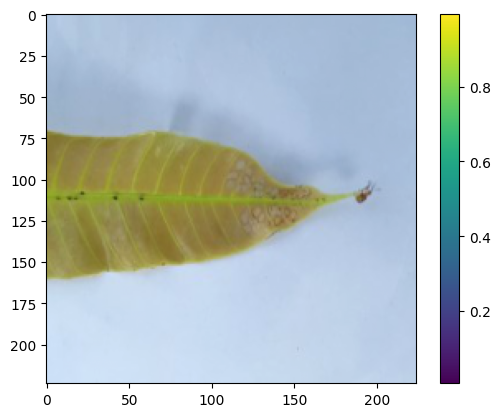

In [4]:
plt.figure()
plt.imshow(X_array[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
import pickle

file_path = '/content/drive/My Drive/y_array.pkl'

with open(file_path, 'rb') as f:
    y_array = pickle.load(f)


In [6]:
train_images, test_images, train_labels, test_labels = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

In [8]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


**SEQUENTIAL MODEL COMPILATION PER STAGE**

**STAGE 1:** BACKPROPAGATION NEURAL NETWORK (BPNN)

In [9]:
# Basic BPNN architecture with one hidden layer.
# architecture parameters
image_height = 224
image_width = 224
num_channels = 3
num_classes = 8
num_epochs = 60
batch_size = 50

num_input_features = image_height * image_width * num_channels
num_hidden_units = 32

# BPNN model
bpnn_model = Sequential()

bpnn_model.add(Dense(num_hidden_units, activation='relu', input_shape=(num_input_features,)))
bpnn_model.add(Dropout(0.5))

bpnn_model.add(Dense(num_classes, activation='softmax'))
bpnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
bpnn_history = bpnn_model.fit(train_images.reshape(-1, num_input_features), train_labels,
                              epochs=num_epochs, batch_size=batch_size,
                              validation_data=(test_images.reshape(-1, num_input_features), test_labels))


Epoch 1/60
64/64 [==============================] - 3s 35ms/step - loss: 6.7908 - accuracy: 0.1278 - val_loss: 2.0797 - val_accuracy: 0.1138
Epoch 2/60
64/64 [==============================] - 1s 23ms/step - loss: 2.0795 - accuracy: 0.1278 - val_loss: 2.0801 - val_accuracy: 0.1138
Epoch 3/60
64/64 [==============================] - 2s 25ms/step - loss: 2.0794 - accuracy: 0.1206 - val_loss: 2.0806 - val_accuracy: 0.1138
Epoch 4/60
64/64 [==============================] - 1s 23ms/step - loss: 2.0793 - accuracy: 0.1278 - val_loss: 2.0811 - val_accuracy: 0.1138
Epoch 5/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0793 - accuracy: 0.1278 - val_loss: 2.0814 - val_accuracy: 0.1138
Epoch 6/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0792 - accuracy: 0.1184 - val_loss: 2.0817 - val_accuracy: 0.1138
Epoch 7/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0792 - accuracy: 0.1225 - val_loss: 2.0820 - val_accuracy: 0.1138
Epoch 8/60
64

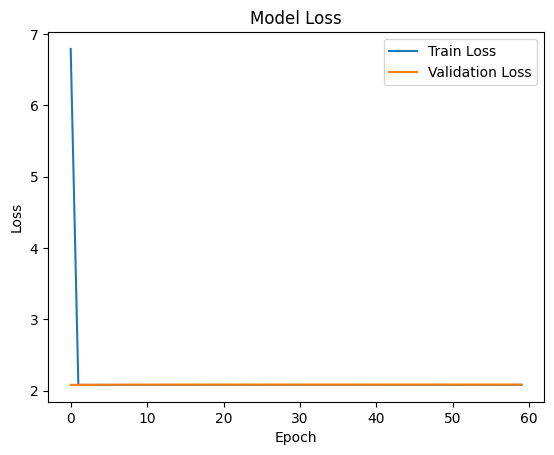

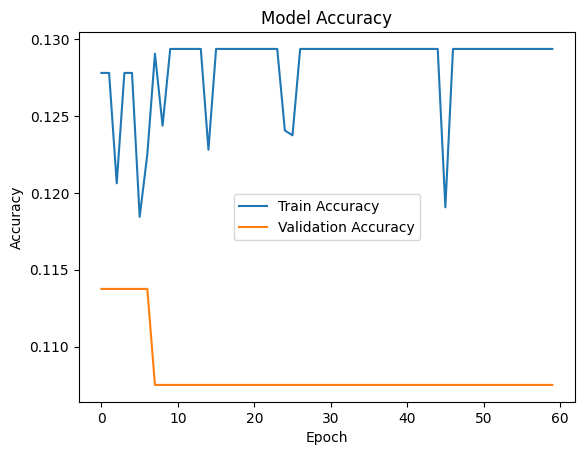

In [10]:
# BACKPROPAGATION NEURAL NETWORK (BPNN) VALIDATION LOSS AND ACCURACY
# training & validation loss values
plt.plot(bpnn_history.history['loss'], label='Train Loss')
plt.plot(bpnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# training & validation accuracy values
plt.plot(bpnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(bpnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


25/25 [==============================] - 0s 3ms/step


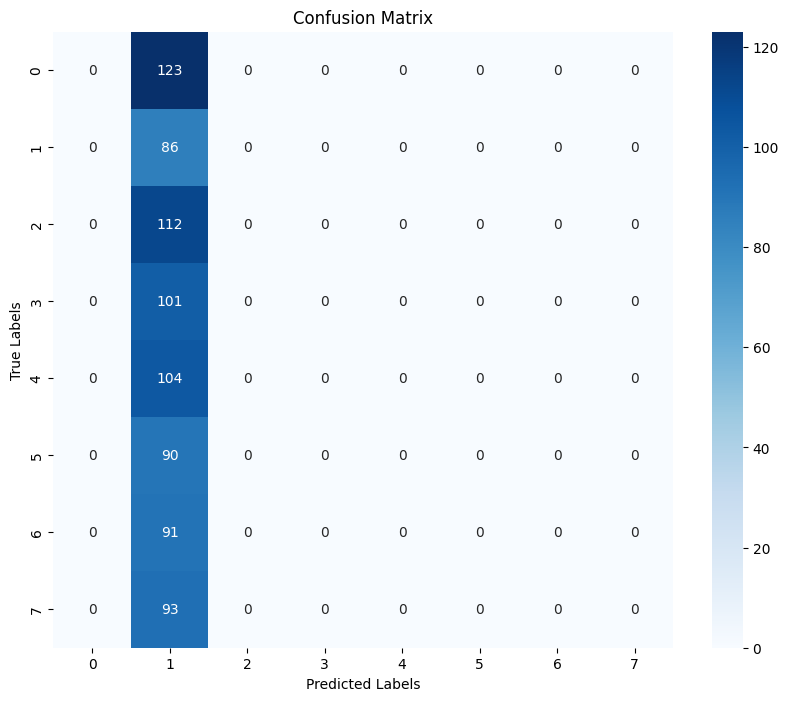

In [11]:
# Basic BPNN model's predictions on the test data (confusion matrix)
test_probabilities = bpnn_model.predict(test_images.reshape(-1, num_input_features))
test_predictions = np.argmax(test_probabilities, axis=1)

confusion = confusion_matrix(test_labels, test_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [12]:
# precision, recall, and F1-score with 'weighted' averaging & Micro Averaging
precision_weighted = precision_score(test_labels, test_predictions, average='weighted')
recall_weighted = recall_score(test_labels, test_predictions, average='weighted')
f1_weighted = f1_score(test_labels, test_predictions, average='weighted')

precision_micro = precision_score(test_labels, test_predictions, average='micro')
recall_micro = recall_score(test_labels, test_predictions, average='micro')
f1_micro = f1_score(test_labels, test_predictions, average='micro')

print("Weighted Averaging:")
print(f"Precision: {precision_weighted}")
print(f"Recall: {recall_weighted}")
print(f"F1-Score: {f1_weighted}")
print("\nMicro Averaging:")
print(f"Precision: {precision_micro}")
print(f"Recall: {recall_micro}")
print(f"F1-Score: {f1_micro}")



Weighted Averaging:
Precision: 0.011556249999999999
Recall: 0.1075
F1-Score: 0.020869074492099324

Micro Averaging:
Precision: 0.1075
Recall: 0.1075
F1-Score: 0.10749999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


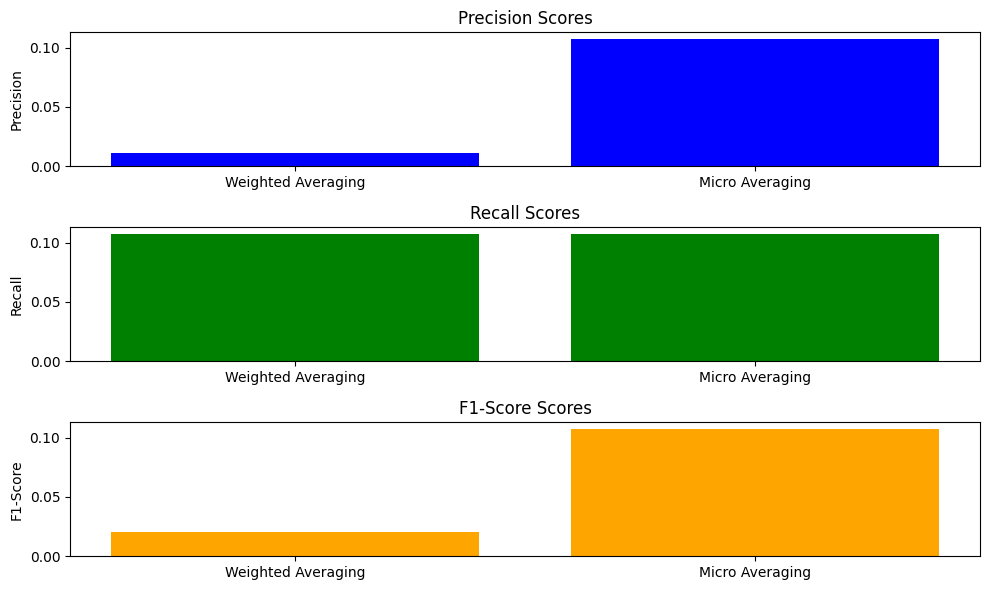

In [13]:
# Data
averaging_methods = ['Weighted Averaging', 'Micro Averaging']
precision_scores = [0.011556249999999999, 0.1075]
recall_scores = [0.1075, 0.1075]
f1_scores = [0.020869074492099324, 0.10749999999999998]

# Plotting
plt.figure(figsize=(10, 6))

# Precision
plt.subplot(3, 1, 1)
plt.bar(averaging_methods, precision_scores, color='blue')
plt.ylabel('Precision')
plt.title('Precision Scores')

# Recall
plt.subplot(3, 1, 2)
plt.bar(averaging_methods, recall_scores, color='green')
plt.ylabel('Recall')
plt.title('Recall Scores')

# F1-Score
plt.subplot(3, 1, 3)
plt.bar(averaging_methods, f1_scores, color='orange')
plt.ylabel('F1-Score')
plt.title('F1-Score Scores')

plt.tight_layout()
plt.show()


In [14]:
# BPNN model with two hidden layers/ Multi-Layer Perceptron (MLP)/ Deep BPNN or Deep MLP

bpnn_model = Sequential()

bpnn_model.add(Dense(32, activation='relu', input_shape=(num_input_features,)))
bpnn_model.add(Dropout(0.5))

bpnn_model.add(Dense(64, activation='relu'))
bpnn_model.add(Dropout(0.5))

bpnn_model.add(Dense(num_classes, activation='softmax'))
bpnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
bpnn_history2 = bpnn_model.fit(train_images.reshape(-1, num_input_features), train_labels,
                              epochs=num_epochs, batch_size=batch_size,
                              validation_data=(test_images.reshape(-1, num_input_features), test_labels))


Epoch 1/60
64/64 [==============================] - 3s 40ms/step - loss: 4.1961 - accuracy: 0.1194 - val_loss: 2.0800 - val_accuracy: 0.1125
Epoch 2/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0795 - accuracy: 0.1166 - val_loss: 2.0805 - val_accuracy: 0.1138
Epoch 3/60
64/64 [==============================] - 1s 23ms/step - loss: 2.0793 - accuracy: 0.1203 - val_loss: 2.0808 - val_accuracy: 0.1125
Epoch 4/60
64/64 [==============================] - 2s 24ms/step - loss: 2.0793 - accuracy: 0.1281 - val_loss: 2.0813 - val_accuracy: 0.1125
Epoch 5/60
64/64 [==============================] - 1s 23ms/step - loss: 2.0792 - accuracy: 0.1209 - val_loss: 2.0816 - val_accuracy: 0.1125
Epoch 6/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0792 - accuracy: 0.1281 - val_loss: 2.0818 - val_accuracy: 0.1125
Epoch 7/60
64/64 [==============================] - 1s 22ms/step - loss: 2.0792 - accuracy: 0.1234 - val_loss: 2.0821 - val_accuracy: 0.1125
Epoch 8/60
64

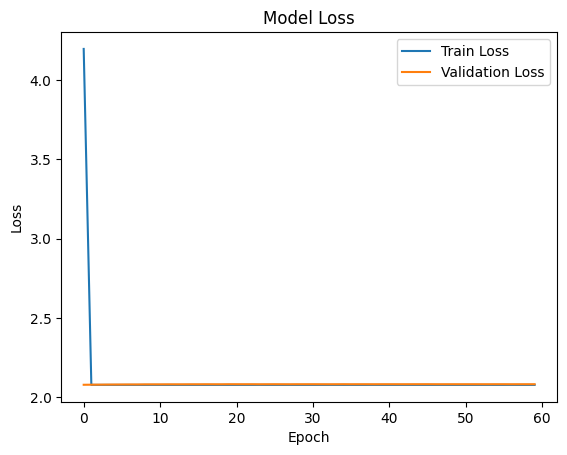

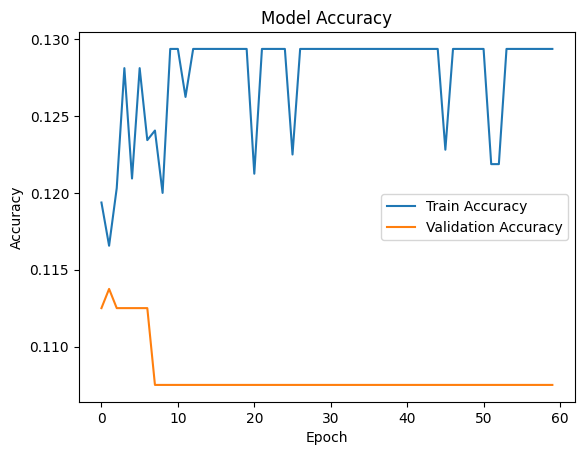

In [15]:
# BACKPROPAGATION NEURAL NETWORK (BPNN) VALIDATION LOSS AND ACCURACY
# training & validation loss values
plt.plot(bpnn_history2.history['loss'], label='Train Loss')
plt.plot(bpnn_history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# training & validation accuracy values
plt.plot(bpnn_history2.history['accuracy'], label='Train Accuracy')
plt.plot(bpnn_history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

25/25 [==============================] - 0s 3ms/step


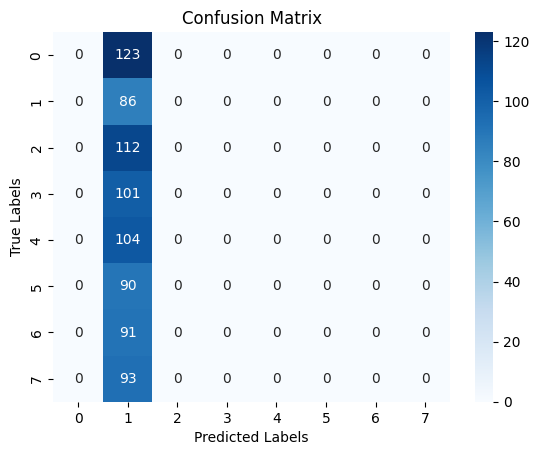

In [16]:
# BPNN model's predictions on the test data (confusion matrix)
test_probabilities = bpnn_model.predict(test_images.reshape(-1, num_input_features))
test_predictions = np.argmax(test_probabilities, axis=1)

confusion = confusion_matrix(test_labels, test_predictions)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [17]:
# precision, recall, and F1-score with 'weighted' averaging & Micro Averaging
precision_weighted = precision_score(test_labels, test_predictions, average='weighted')
recall_weighted = recall_score(test_labels, test_predictions, average='weighted')
f1_weighted = f1_score(test_labels, test_predictions, average='weighted')

precision_micro = precision_score(test_labels, test_predictions, average='micro')
recall_micro = recall_score(test_labels, test_predictions, average='micro')
f1_micro = f1_score(test_labels, test_predictions, average='micro')

print("Weighted Averaging:")
print(f"Precision: {precision_weighted}")
print(f"Recall: {recall_weighted}")
print(f"F1-Score: {f1_weighted}")
print("\nMicro Averaging:")
print(f"Precision: {precision_micro}")
print(f"Recall: {recall_micro}")
print(f"F1-Score: {f1_micro}")

Weighted Averaging:
Precision: 0.011556249999999999
Recall: 0.1075
F1-Score: 0.020869074492099324

Micro Averaging:
Precision: 0.1075
Recall: 0.1075
F1-Score: 0.10749999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


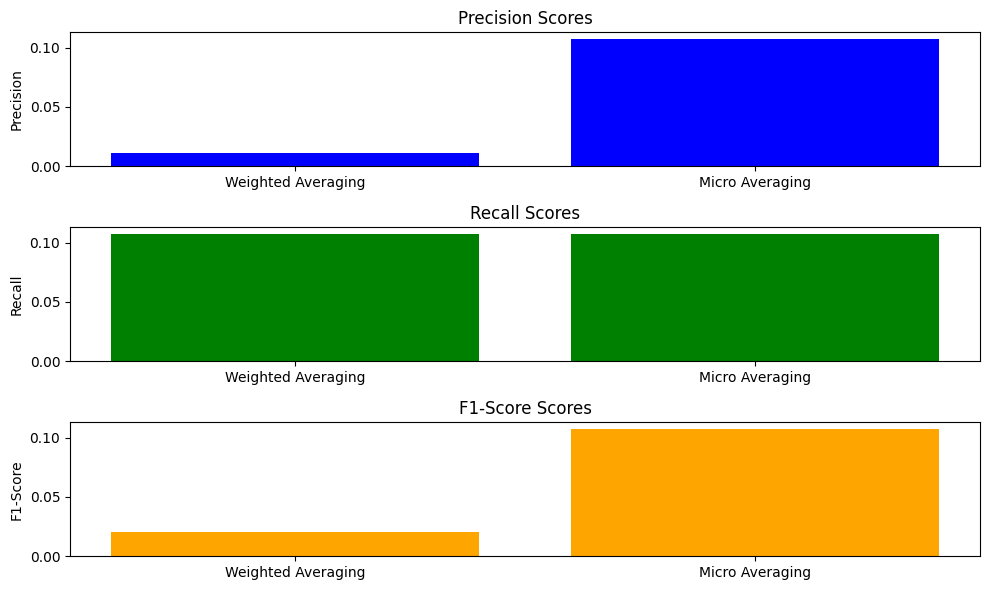

In [18]:
# Data
averaging_methods = ['Weighted Averaging', 'Micro Averaging']
precision_scores = [0.011556249999999999, 0.1075]
recall_scores = [0.1075, 0.1075]
f1_scores = [0.020869074492099324, 0.10749999999999998]

# Plotting
plt.figure(figsize=(10, 6))

# Precision
plt.subplot(3, 1, 1)
plt.bar(averaging_methods, precision_scores, color='blue')
plt.ylabel('Precision')
plt.title('Precision Scores')

# Recall
plt.subplot(3, 1, 2)
plt.bar(averaging_methods, recall_scores, color='green')
plt.ylabel('Recall')
plt.title('Recall Scores')

# F1-Score
plt.subplot(3, 1, 3)
plt.bar(averaging_methods, f1_scores, color='orange')
plt.ylabel('F1-Score')
plt.title('F1-Score Scores')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import confusion_matrix

# Deeper BPNN Model including learning rate, cross-validation, learning curve visualization, and confusion matrices
learning_rate = 0.001

# Lists to store learning curves
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Lists to store confusion matrices
confusion_matrices = []

# Stratified K-Fold cross-validator
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Loop over the folds
for train_idx, val_idx in kfold.split(train_images, train_labels):
    train_data, val_data = train_images[train_idx], train_images[val_idx]
    train_labels_fold, val_labels_fold = train_labels[train_idx], train_labels[val_idx]

    bpnn_model3 = Sequential()
    bpnn_model3.add(Dense(32, activation='relu', input_shape=(num_input_features,)))
    bpnn_model3.add(Dropout(0.5))
    bpnn_model3.add(Dense(64, activation='relu'))
    bpnn_model3.add(Dropout(0.5))
    bpnn_model3.add(Dense(128, activation='relu'))  # Adding the new hidden layer
    bpnn_model3.add(Dropout(0.5))
    bpnn_model3.add(Dense(num_classes, activation='softmax'))

    # Compile the model with the defined learning rate
    optimizer = Adam(learning_rate=learning_rate)
    bpnn_model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Model training
    bpnn_history3 = bpnn_model3.fit(train_data.reshape(-1, num_input_features), train_labels_fold,
                             epochs=num_epochs, batch_size=batch_size,
                             validation_data=(val_data.reshape(-1, num_input_features), val_labels_fold),
                             verbose=0)

    # Storing training and validation losses, and accuracies for each fold
    train_losses.append(bpnn_history3.history['loss'])
    val_losses.append(bpnn_history3.history['val_loss'])
    train_accuracies.append(bpnn_history3.history['accuracy'])
    val_accuracies.append(bpnn_history3.history['val_accuracy'])

    # Model evaluation and confusion matrix
    test_probabilities = bpnn_model3.predict(val_data.reshape(-1, num_input_features))
    test_predictions = np.argmax(test_probabilities, axis=1)
    confusion = confusion_matrix(val_labels_fold, test_predictions)
    confusion_matrices.append(confusion)

34/34 [==============================] - 0s 4ms/step


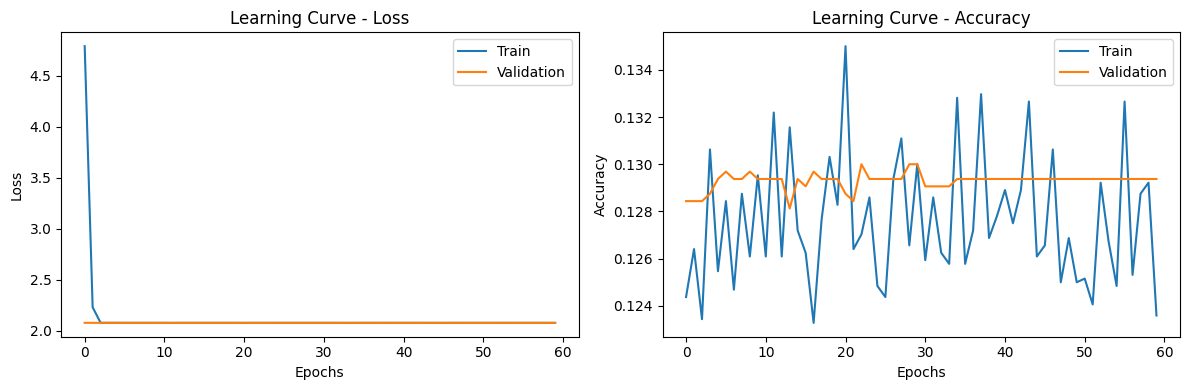

Confusion Matrix - Fold 1:
[[  0 126   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0]
 [  0 130   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0]]

Confusion Matrix - Fold 2:
[[  0 125   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0]
 [  0 137   0   0   0   0   0   0]
 [  0 137   0   0   0   0   0   0]
 [  0 135   0   0   0   0   1   0]]

Confusion Matrix - Fold 3:
[[  0 126   0   0   0   0   0   0]
 [  0 138   0   0   0   0   0   0]
 [  0 129   0   0   0   0   0   0]
 [  0 133   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0]
 [  0 137   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0]
 [  0 135   0   0   0   0   0   0]]



In [20]:
# Plot learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Train')
plt.plot(np.mean(val_losses, axis=0), label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Train')
plt.plot(np.mean(val_accuracies, axis=0), label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Print confusion matrices
for i, confusion in enumerate(confusion_matrices):
    print(f"Confusion Matrix - Fold {i+1}:\n{confusion}\n")
